In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [3]:
data=pd.read_csv("C:/Users/91814/Downloads/delivery_time.csv")

In [4]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


C:\Users\91814\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

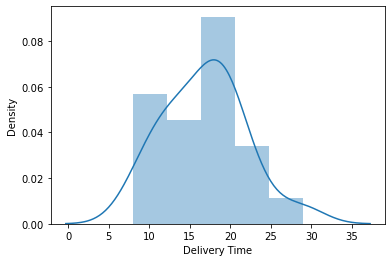

In [6]:
sns.distplot(data['Delivery Time'])

C:\Users\91814\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

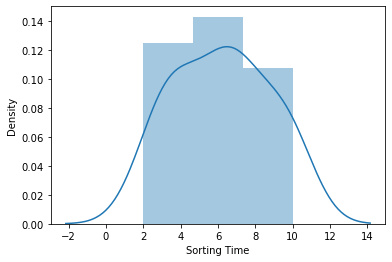

In [7]:
sns.distplot(data['Sorting Time'])

In [8]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

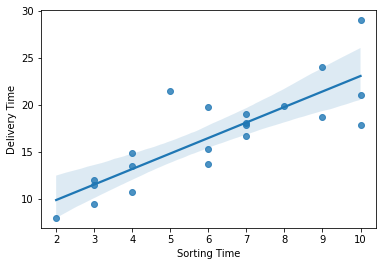

In [9]:
sns.regplot(x="Sorting Time",y="Delivery Time",data=data)

In [10]:
# Renaming Columns
data=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data


,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [11]:
model=smf.ols("delivery_time~sorting_time",data=data).fit()

In [12]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [13]:
print(model.tvalues,'\n' ,model.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [14]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [15]:
#predicting a data say sorting time 8,6
newdata=pd.Series([8,6])

In [16]:
newdata

0    8
1    6
dtype: int64

In [17]:
data_pred=pd.DataFrame(newdata,columns=['sorting_time'])

In [18]:
data_pred

,sorting_time
0,8
1,6


In [24]:
model.predict(data_pred)

0    19.774893
1    16.476853
dtype: float64

In [28]:
from numpy import sqrt

In [38]:
model1=smf.ols("sqrt(delivery_time)~sorting_time",data=data).fit()

In [39]:
model1.params

Intercept       2.772731
sorting_time    0.206632
dtype: float64

In [40]:
print(model1.tvalues,'\n' ,model.pvalues)

Intercept       13.527452
sorting_time     6.723095
dtype: float64 
 Intercept       3.339366e-11
sorting_time    2.001215e-06
dtype: float64


In [42]:
(model1.rsquared,model1.rsquared_adj)

(0.704049871541756, 0.6884735489913221)

In [43]:
newdata=pd.Series([6,12])

In [44]:
newdata

0     6
1    12
dtype: int64

In [45]:
data_pred=pd.DataFrame(newdata,columns=['sorting_time'])

In [46]:
data_pred

,sorting_time
0,6
1,12


In [47]:
model1.predict(data_pred)

0    4.012522
1    5.252313
dtype: float64